# Predictions made on house data

In this code, I have used [California housing dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset). The house values will be predicted based pmn properties of the house and neighbourhood.

Basic characteristics of the dataset:
*   Number of instances: 20640
*   Number of attributes: 8 numeric attributes plus the target
*   Attribute information:
    1.   MedInc: median income in block group
    2.   HouseAge: median house age in block group
    3.   AveRooms: average number of rooms per household
    4. AveBedrms: average number of bedrooms per household
    5. Population: block group population
    6. AveOccup: average number of household members
    7. Latitude: block group latitude
    8. Longitude: block group longitude
    
The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import sqrt
%matplotlib inline
import random
from IPython import display

import tensorflow as tf
from keras import Sequential
from keras.layers import Dense
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [4]:
# as_frame = True to load the dataset as a Pandas dataframe
california_housing = fetch_california_housing(as_frame = True)

## Exploring the dataset

In [6]:
california_housing.data.head()
# These are all the features which decide our outcome.

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
california_housing.target.head()
# These are the values we want to predict

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [9]:
california_housing.frame.info()
# The dataset as 20640 samples and 8 features
# We can see there are no missing values
# All features are numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


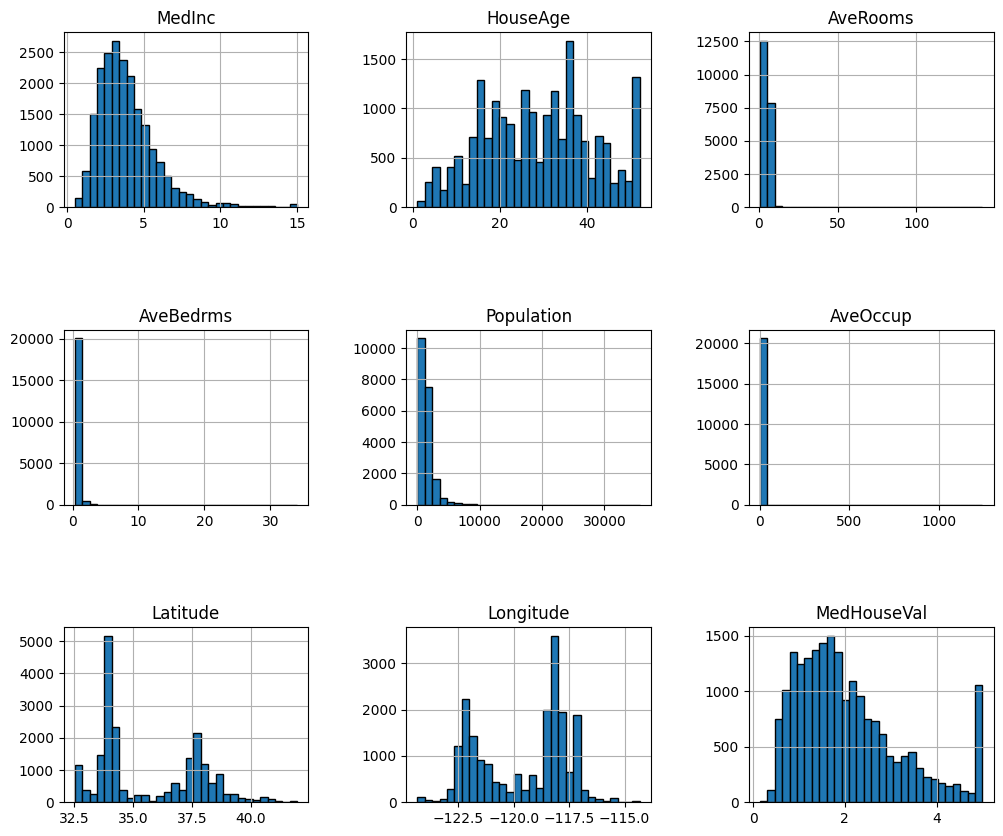

In [12]:
california_housing.frame.hist(figsize=(12,10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

# We see the median income has a long tail. There are some people getting a high salary
# Average House Age, the distribution looks almost normal
# For Average Rooms, Average Bedrooms, Average Occupancy, the scale seems too large and the outputs are not noticeable. There could be outliers too.

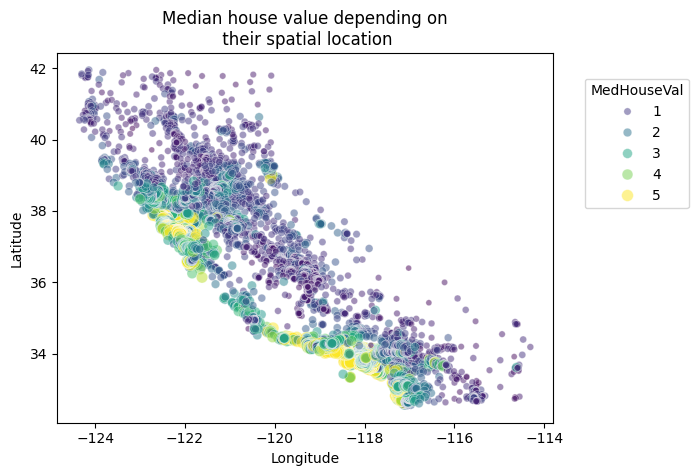

In [15]:
# We can plot X as longitude and Y as latitude to see how they are related to hopuse prices
sns.scatterplot(
    data= california_housing.frame,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5
)
plt.legend(title="MedHouseVal",
           bbox_to_anchor=(1.05,0.95),
           loc="upper left")
_= plt.title("Median house value depending on\n their spatial location")

## Data pre-processing

In [16]:
california_housing = fetch_california_housing()

# split into input and output columns
X,y = california_housing.data, california_housing.target
# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

# check the structure
print("Training features:", X_train.shape)
print("Training labels:", X_test.shape)
print("Testing features:", y_train.shape)
print("Training labels:", y_test.shape)

Training features: (13828, 8)
Training labels: (6812, 8)
Testing features: (13828,)
Training labels: (6812,)


In [59]:
# Number of input features
n_features = X_train.shape[1]
print(n_features)

8


## Model Definition
This is a regression problem as we are predicting prices. So, the output layer will have one node. The activation function will be linear activation function.


In [60]:
model = Sequential()
model.add(Dense(8, activation='relu', kernel_initializer="he_normal", input_shape=(n_features,)))
model.add(Dense(4, activation='relu', kernel_initializer="he_normal"))
model.add(Dense(1))

In [61]:
optim = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optim, loss='mse')

In [ ]:
history = model.fit(X_train, y_train, epochs=150, batch_size=164, verbose=2)

In [63]:
# Evaluate model
error = model.evaluate(X_test, y_test, verbose=0)
print(f"MSE: {error}, RMSE: {sqrt(error)}")

MSE: 0.5011059045791626, RMSE: 0.7078883418867432


## Make predictions

In [65]:
# Let's make a function that randomly chooses the row, and makes predictions
def random_housing_predictor():
  num = random.randint(0, 20640)
  row_chosen = [feature for feature in california_housing.data[num]]
  true_output = california_housing.target[num]
  y_hat = model.predict([row_chosen])
  print(f"True output: {true_output},\n Predicted Output: {y_hat}")

In [67]:
random_housing_predictor()

1/1 [==============================] - 0s 37ms/step
True output: 3.2,
 Predicted Output: [[3.3647914]]


## Interpret the model

In [68]:
model.summary()
# There are three layers. First is the input layer, followed by input, and the last is output layer with node 1

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 113 (452.00 Byte)
Trainable params: 113 (452.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The model is a neural network architecture defined using Keras Sequential API. It has three dense (fully connected) layers.

The None dimension in the output shapes indicates that the model can accept inputs of any batch size.
1. First layer has 8 neurons.Total paramters are 72.
2. Second layer has 4 neurons. Total parameters are 36
  
  `(8 * 4) + 4`. This is equal to `36`

3. Third layer has 1 neuron

  `(4 * 1) + 1`. This is equal to `5`

Total, there are `72 + 36 + 5 = 113` parameters.